# Housing Prices

## Importaing all libraries

In [71]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px




%matplotlib inline 



## Reading the data 

In [72]:
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0)
housing.shape

(2580, 81)

In [73]:
Realestate = pd.read_csv('Ames_Real_Estate_Data.csv', index_col=0)
Realestate.shape

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_19771/2318822397.py:1: DtypeWarning:

Columns (36,40,81,87) have mixed types. Specify dtype option on import or set low_memory=False.



(22213, 90)

In [74]:
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [75]:
housing.describe()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,2.580000e+03,2580.000000,2580.000000,2580.000000,2118.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,...,2579.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,7.148300e+08,1486.039922,178059.623256,57.691860,68.516053,10120.153488,6.046124,5.618605,1970.313953,1983.751938,...,466.842575,95.919767,46.085271,23.214341,2.511240,16.200388,1.662016,48.731395,6.150775,2007.838372
std,1.886626e+08,488.650181,75031.089374,42.802105,22.835831,8126.937892,1.367590,1.122008,29.719705,20.490242,...,207.476842,129.052016,66.060664,64.107825,25.293935,56.824783,30.339396,498.725058,2.670647,1.312333
min,5.263011e+08,334.000000,12789.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,5.313630e+08,1112.000000,129975.000000,20.000000,57.000000,7406.750000,5.000000,5.000000,1953.000000,1965.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,5.354546e+08,1436.000000,159900.000000,50.000000,68.000000,9391.000000,6.000000,5.000000,1972.000000,1992.000000,...,474.000000,0.000000,25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,9.071811e+08,1733.000000,209625.000000,70.000000,80.000000,11494.000000,7.000000,6.000000,1999.000000,2003.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1.007100e+09,4676.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000


In [76]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2580 non-null   int64  
 1   GrLivArea      2580 non-null   int64  
 2   SalePrice      2580 non-null   int64  
 3   MSSubClass     2580 non-null   int64  
 4   MSZoning       2580 non-null   object 
 5   LotFrontage    2118 non-null   float64
 6   LotArea        2580 non-null   int64  
 7   Street         2580 non-null   object 
 8   Alley          168 non-null    object 
 9   LotShape       2580 non-null   object 
 10  LandContour    2580 non-null   object 
 11  Utilities      2580 non-null   object 
 12  LotConfig      2580 non-null   object 
 13  LandSlope      2580 non-null   object 
 14  Neighborhood   2580 non-null   object 
 15  Condition1     2580 non-null   object 
 16  Condition2     2580 non-null   object 
 17  BldgType       2580 non-null   object 
 18  HouseStyl

In [78]:
# Getting the numerical features out of the dataset

print(f"The total number of numerical features is :",  {len(housing.select_dtypes(exclude='object').columns)},"\n" ,
      housing.select_dtypes(exclude='object').columns)


The total number of numerical features is : {38} 
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


## Cleaning and Tuning the dataset

In [79]:
# dropping ID column

housing.drop(columns=['PID'], inplace=True)

In [80]:
# missing Values

# show only the count of columns with null values

columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 27


PoolQC          2571
MiscFeature     2483
Alley           2412
Fence           2055
FireplaceQu     1241
LotFrontage      462
GarageCond       129
GarageQual       129
GarageFinish     129
GarageYrBlt      129
GarageType       127
BsmtExposure      71
BsmtFinType2      70
BsmtFinType1      69
BsmtQual          69
BsmtCond          69
MasVnrArea        14
MasVnrType        14
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Electrical         1
dtype: int64

In [81]:
# check correlation of missing values columns to price


corr_col = list(columns_NA.index)
corr_col.append('SalePrice')
housing[corr_col].corr()




,LotFrontage,GarageYrBlt,MasVnrArea,BsmtHalfBath,BsmtFullBath,TotalBsmtSF,BsmtUnfSF,GarageCars,GarageArea,BsmtFinSF2,BsmtFinSF1,SalePrice
LotFrontage,1.000000,0.051578,0.202139,-0.028832,0.106641,0.307885,0.104167,0.302285,0.337158,0.055247,0.177304,0.358577
GarageYrBlt,0.051578,1.000000,0.246120,-0.053576,0.174757,0.339679,0.133690,0.581007,0.554057,-0.046385,0.214492,0.520763
MasVnrArea,0.202139,0.246120,1.000000,0.002436,0.129113,0.361515,0.080283,0.348303,0.348993,-0.009519,0.277336,0.500964
BsmtHalfBath,-0.028832,-0.053576,0.002436,1.000000,-0.164064,0.000899,-0.108801,-0.029313,-0.018288,0.101400,0.067414,-0.033802
BsmtFullBath,0.106641,0.174757,0.129113,-0.164064,1.000000,0.330192,-0.383609,0.161022,0.183992,0.169453,0.632603,0.291080
TotalBsmtSF,0.307885,0.339679,0.361515,0.000899,0.330192,1.000000,0.421573,0.435333,0.465177,0.110119,0.512642,0.652222
BsmtUnfSF,0.104167,0.133690,0.080283,-0.108801,-0.383609,0.421573,1.000000,0.166081,0.149994,-0.242334,-0.480927,0.167519
GarageCars,0.302285,0.581007,0.348303,-0.029313,0.161022,0.435333,0.166081,1.000000,0.889603,-0.004548,0.261766,0.638801
GarageArea,0.337158,0.554057,0.348993,-0.018288,0.183992,0.465177,0.149994,0.889603,1.000000,0.016331,0.298309,0.634992
BsmtFinSF2,0.055247,-0.046385,-0.009519,0.101400,0.169453,0.110119,-0.242334,-0.004548,0.016331,1.000000,-0.058911,0.022520


In [82]:
# Delete Columns with Negative Correlations

#housing.drop(columns=['BsmtHalfBath'], inplace=True)



# Delete top 5 columns with missing values

#housing.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], inplace=True)

# Remove Columns with small correlation

#housing.drop(columns=['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtFullBath','LotFrontage','GarageYrBlt'], inplace=True)

In [83]:
# Fill the rest of Null. Columns with best fill based on Discription File



housing['MasVnrType'].fillna('None', inplace=True)


for i in ['GarageType', 'GarageFinish', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1'
         ,'PoolQC','MiscFeature', 'Alley', 'Fence']:
    housing[i].fillna('NA', inplace=True)

# Replacing small number of null value with most common value in column

housing['Electrical'].fillna(housing['Electrical'].value_counts().idxmax(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].value_counts().idxmax(), inplace=True)
housing['GarageCars'].fillna(housing['GarageCars'].value_counts().idxmax(), inplace=True)
housing['GarageArea'].fillna(housing['GarageArea'].value_counts().idxmax(), inplace=True)
housing['TotalBsmtSF'].fillna(housing['TotalBsmtSF'].value_counts().idxmax(), inplace=True)
housing['BsmtUnfSF'].fillna(housing['BsmtUnfSF'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF2'].fillna(housing['BsmtFinSF2'].value_counts().idxmax(), inplace=True)
housing['BsmtFinSF1'].fillna(housing['BsmtFinSF1'].value_counts().idxmax(), inplace=True)
housing['BsmtFullBath'].fillna(housing['BsmtFullBath'].value_counts().idxmax(), inplace=True)
housing['BsmtHalfBath'].fillna(housing['BsmtHalfBath'].value_counts().idxmax(), inplace=True)

# From the Data description File we see the following columns has the same values.
# Columns FireplaceQu ,BsmtQual,ExterQual ,ExterCond ,HeatingQC,BsmtCond ,GarageQual ,KitchenQual , GarageCond 
# they have the same values to decribe them :

# Ex	Excellent
# Gd	Good
# TA	Typical/Average
# Fa	Fair
# Po	Poor
# NA	No Garage


# so we replace the cahr values with numerical and NA with 0



housing['FireplaceQu'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['FireplaceQu'].fillna(0, inplace=True)

housing['BsmtQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtQual'].fillna(0, inplace=True)

housing['ExterQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterQual'].fillna(0, inplace=True)

housing['ExterCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['ExterCond'].fillna(0, inplace=True)

housing['HeatingQC'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['HeatingQC'].fillna(0, inplace=True)

housing['BsmtCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['BsmtCond'].fillna(0, inplace=True)

housing['GarageQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageQual'].fillna(0, inplace=True)

housing['KitchenQual'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['KitchenQual'].fillna(0, inplace=True)

housing['GarageCond'].replace({'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}, inplace=True)
housing['GarageCond'].fillna(0, inplace=True)


# Fill With mean values

housing['LotFrontage'].fillna(housing['LotFrontage'].mean(), inplace=True)

# fill garage year built with house year built

housing['GarageYrBlt'].fillna(housing['YearBuilt'].mean(), inplace=True)


In [84]:
columns_NA = housing.isna().sum()[housing.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))

columns_NA



Columns with missing values: 0


Series([], dtype: int64)

In [85]:
print("New Data set shape is : ",housing.shape)
print("\n\n")


housing.info()




New Data set shape is :  (2580, 80)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 1 to 763
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2580 non-null   int64  
 1   SalePrice      2580 non-null   int64  
 2   MSSubClass     2580 non-null   int64  
 3   MSZoning       2580 non-null   object 
 4   LotFrontage    2580 non-null   float64
 5   LotArea        2580 non-null   int64  
 6   Street         2580 non-null   object 
 7   Alley          2580 non-null   object 
 8   LotShape       2580 non-null   object 
 9   LandContour    2580 non-null   object 
 10  Utilities      2580 non-null   object 
 11  LotConfig      2580 non-null   object 
 12  LandSlope      2580 non-null   object 
 13  Neighborhood   2580 non-null   object 
 14  Condition1     2580 non-null   object 
 15  Condition2     2580 non-null   object 
 16  BldgType       2580 non-null   object 
 17  HouseStyle    

In [86]:
# Save new cleaned data

housing.to_csv('Housing_cleaned.csv')

In [87]:
housing.duplicated().sum()

1

In [88]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicateRows = housing[housing.duplicated()]
 
# Print the resultant Dataframe
duplicateRows

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,1717,194000,50,RL,80.0,12400,Pave,NA,Reg,HLS,...,113,0,NA,NA,NA,0,2,2006,WD,Normal


In [89]:
housing.drop_duplicates(keep='first')

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,856,126000,30,RL,68.516053,7890,Pave,NA,Reg,Lvl,...,166,0,NA,NA,NA,0,3,2010,WD,Normal
2,1049,139500,120,RL,42.000000,4235,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,2,2009,WD,Normal
3,1001,124900,30,C (all),60.000000,6060,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,11,2007,WD,Normal
4,1039,114000,70,RL,80.000000,8146,Pave,NA,Reg,Lvl,...,111,0,NA,NA,NA,0,5,2009,WD,Normal
5,1665,227000,60,RL,70.000000,8400,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,30,RL,68.516053,8854,Pave,NA,Reg,Lvl,...,40,0,NA,NA,NA,0,5,2009,WD,Normal
760,1733,139600,20,RL,68.516053,13680,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
761,2002,145000,90,RH,82.000000,6270,Pave,NA,Reg,HLS,...,0,0,NA,NA,NA,0,8,2007,WD,Normal
762,1842,217500,60,RL,68.516053,8826,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,7,2007,WD,Normal


In [90]:
# Assign features to X and Y


#[SalesCor[SalesCor.values > 0.5].index]

X = housing.drop(['SalePrice'], axis=1)

Y = housing.SalePrice

## Visualizing the dataset

House Price is highly correlated with : 


[Index(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual', 'KitchenQual',
        'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'GarageArea', 'BsmtQual',
        'YearBuilt', 'FullBath', 'FireplaceQu', 'GarageYrBlt', 'YearRemodAdd'],
       dtype='object')]

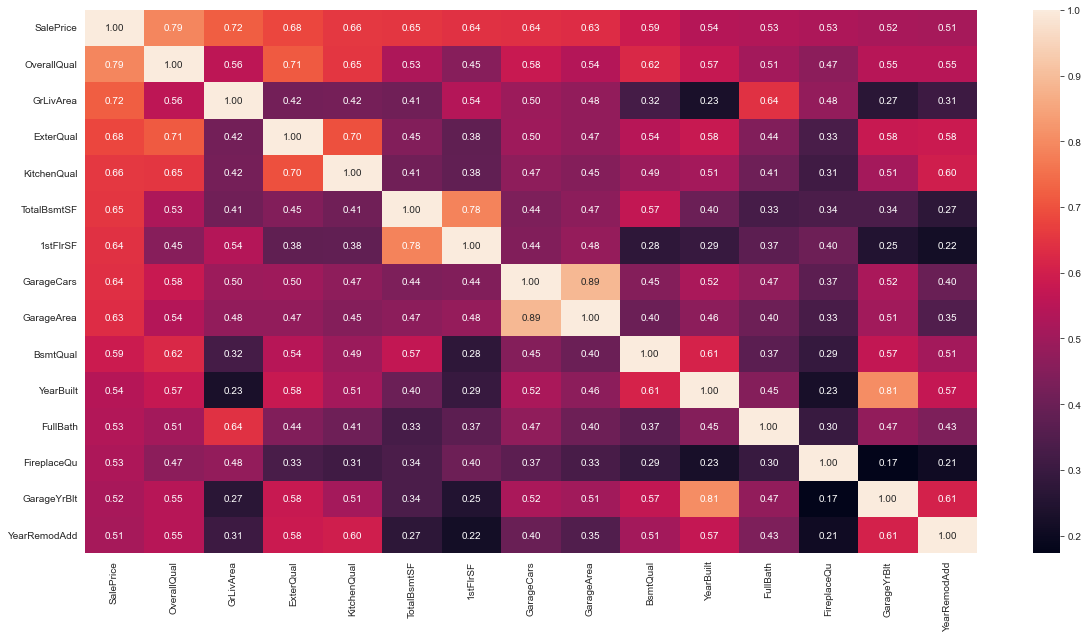

In [104]:
# Features with hight correlation only columns with correlation > 0.5

SalesCor = housing.corr()['SalePrice'].sort_values(ascending= False)

hight_correlation=housing[SalesCor[SalesCor.values > 0.5].index]

corr=hight_correlation.corr()
f, ax=plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot = True, fmt = '.2f')

# PRice is gighly correlated with 
print ("House Price is highly correlated with : ")
[SalesCor[SalesCor.values > 0.5].index]

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Top 10 numerical Correlated columns

estimator = LinearRegression()

rfe = RFE(estimator, n_features_to_select=10, step=1)

selector = rfe.fit(X.fillna(0).select_dtypes(exclude='object'), Y)

selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'ExterQual',
 'BsmtQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

In [110]:

plt.figure(figsize=(15, 10))

fig = px.box(housing, x="OverallQual", y="SalePrice",color = 'OverallQual')
fig.update_layout(
    title="House Price by Overall Quality",
    xaxis_title="Quality",
    yaxis_title="Price ($)",
    legend_title="Legend Title",
    showlegend=False,
     xaxis = dict(
        tickmode = 'linear',
        tick0 = 1,
        dtick = 1
    )
    )




fig.show()





# most important feature is over all quality , price increases with higher house quality

<Figure size 1080x720 with 0 Axes>

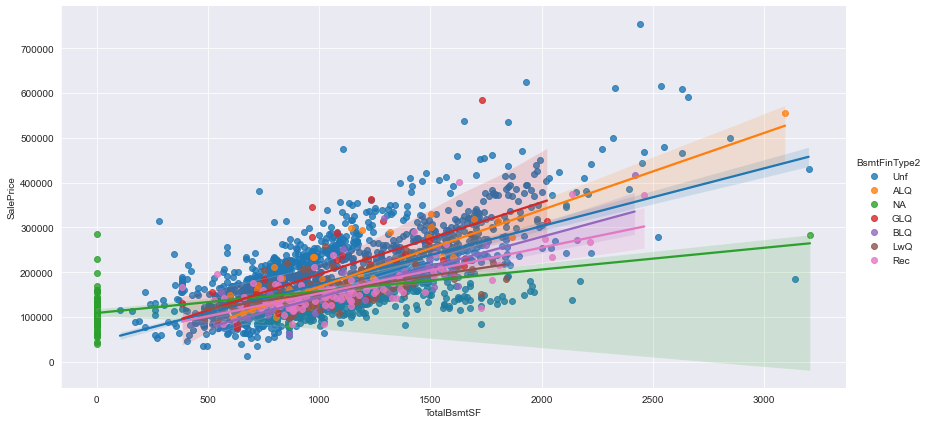

In [111]:
#sales price against Total Basment sliced by BsmtFinType1
sns.lmplot(x='TotalBsmtSF', y='SalePrice', hue='BsmtFinType2',
           data=housing, fit_reg=True,height=6, aspect=2)

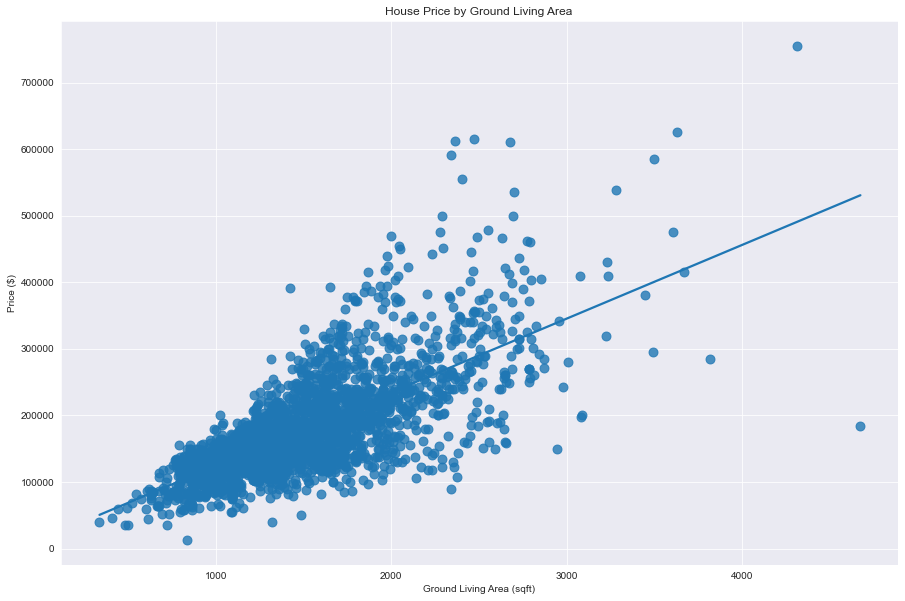

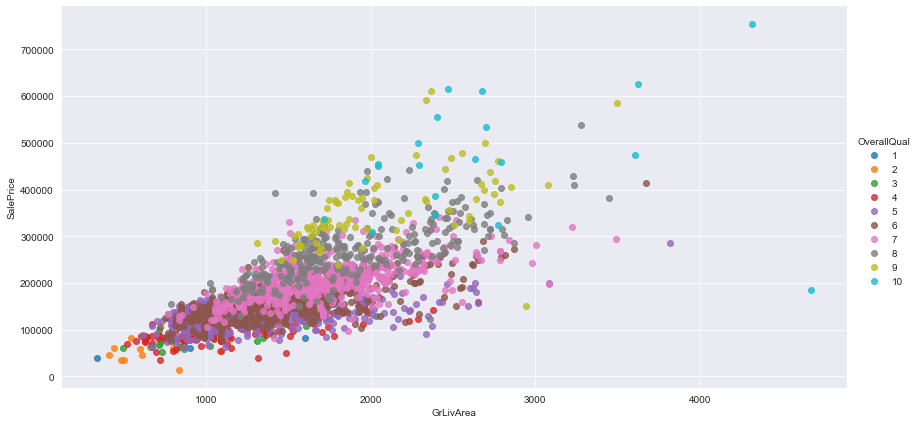

In [53]:
# Ground Living Area


sns.set_style('darkgrid')
plt.figure(figsize=(15, 10))
sns.regplot(x="GrLivArea", y="SalePrice",data=housing ,ci=None, scatter_kws={"s": 80}).set(
    xlabel='Ground Living Area (sqft) ', 
    ylabel='Price ($)'
)
title = plt.title('House Price by Ground Living Area ')




#sales price against Living Area sliced by Overall Quality
sns.lmplot(x='GrLivArea', y='SalePrice', hue='OverallQual',
           data=housing, fit_reg=False,height=6, aspect=2)



# some outliers when GrlivArea > 4000


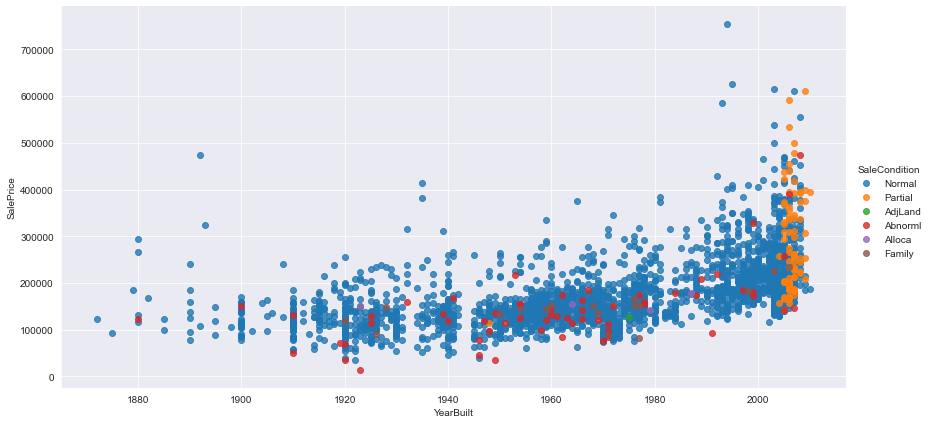

In [112]:
#sales price against Year Built sliced by BsmtFinType1
sns.lmplot(x='YearBuilt', y='SalePrice', hue='SaleCondition',
           data=housing, fit_reg=False,height=6, aspect=2)

## ML Prediction

### Linear Regression

In [70]:
# Importing Libraries

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import norm
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedKFold
from numpy import arange
from sklearn.feature_selection import RFE


In [55]:
# since LR is very seneitive to outliers we will remove them :


X.drop(housing[(housing.GrLivArea > 4000)].index, axis=0, inplace=True)
Y.drop(housing[(housing.GrLivArea > 4000)].index, axis=0, inplace=True)

print(X.shape)
print(Y.shape)

(2574, 79)
(2574,)


In [56]:
X.corr()


,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
GrLivArea,1.000000,0.071180,0.305045,0.252294,0.556227,-0.106635,0.226992,0.306315,0.371600,0.410150,...,0.147364,0.244112,0.314090,0.002284,0.009278,0.100592,0.059070,-0.003579,0.039818,-0.005109
MSSubClass,0.071180,1.000000,-0.408412,-0.199118,0.057113,-0.076153,0.054617,0.057179,0.018178,0.033724,...,-0.104755,-0.017490,-0.008095,-0.029031,-0.041905,-0.055379,-0.013486,-0.027324,0.007352,-0.025491
LotFrontage,0.305045,-0.408412,1.000000,0.338088,0.161888,-0.048379,0.092307,0.057275,0.177066,0.112228,...,0.103830,0.104643,0.125347,0.003995,0.030492,0.077219,0.086338,0.012721,0.001240,-0.000857
LotArea,0.252294,-0.199118,0.338088,1.000000,0.075586,-0.032574,0.010714,0.008819,0.095951,0.039446,...,0.071029,0.153986,0.077813,0.018072,0.017959,0.054517,0.052904,0.040527,0.008974,-0.016051
OverallQual,0.556227,0.057113,0.161888,0.075586,1.000000,-0.095406,0.573984,0.545853,0.396058,0.712111,...,0.276696,0.246779,0.283391,-0.133633,0.014569,0.050305,-0.002343,-0.025675,0.017883,0.007715
OverallCond,-0.106635,-0.076153,-0.048379,-0.032574,-0.095406,1.000000,-0.396297,0.067493,-0.143296,-0.140127,...,0.016042,0.015078,-0.066158,0.082990,0.041995,0.050605,-0.021192,0.046110,0.013507,0.017376
YearBuilt,0.226992,0.054617,0.092307,0.010714,0.573984,-0.396297,1.000000,0.571037,0.301748,0.577285,...,0.267704,0.225703,0.177908,-0.359511,0.009607,-0.042495,0.004976,-0.027317,-0.007715,0.016195
YearRemodAdd,0.306315,0.057179,0.057275,0.008819,0.545853,0.067493,0.571037,1.000000,0.170004,0.584411,...,0.133891,0.216749,0.225184,-0.202859,0.028615,-0.043155,-0.018716,-0.016680,0.002354,0.064930
MasVnrArea,0.371600,0.018178,0.177066,0.095951,0.396058,-0.143296,0.301748,0.170004,1.000000,0.328035,...,0.125015,0.144541,0.112435,-0.101282,0.012438,0.066668,-0.003482,-0.021511,-0.005775,-0.017546
ExterQual,0.410150,0.033724,0.112228,0.039446,0.712111,-0.140127,0.577285,0.584411,0.328035,1.000000,...,0.188777,0.201792,0.264906,-0.153751,0.028713,0.000900,-0.006149,-0.039816,0.003861,0.033373


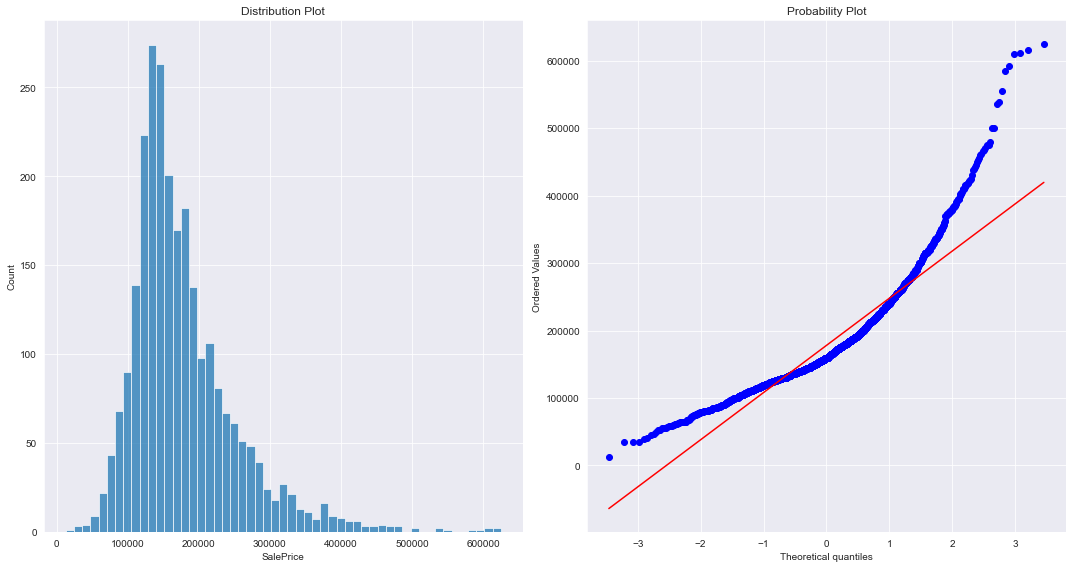

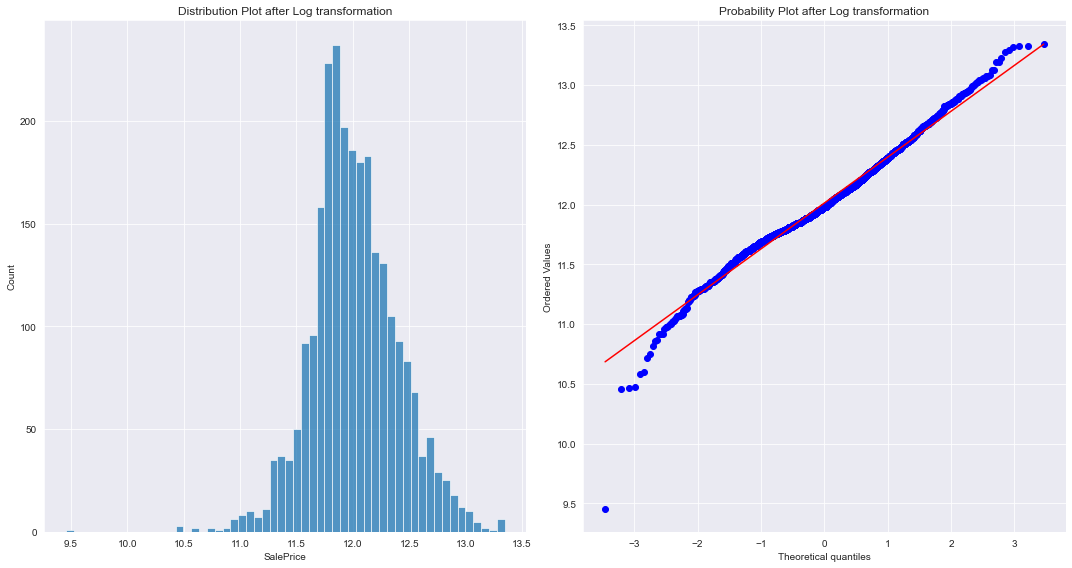

In [64]:
# Check Price Normality


fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(Y, ax=ax[0])
ax[0].set_title('Distribution Plot')

ax[1] = stats.probplot((Y), plot=plt)
plt.tight_layout()


# We see that it is right skewed , we can apply log transformation to it 

Y = np.log(1 + Y)

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

sns.histplot(Y, ax=ax[0])
ax[0].set_title('Distribution Plot after Log transformation')

ax[1] = stats.probplot((Y), plot=plt)

plt.title('Probability Plot after Log transformation')
plt.tight_layout()






In [65]:
# we now check the normality for all other columns based on the skew ratio 


# Skew Rules S :
    
#     -1 > S OR S > 1 =  highly skewed
    
#     -1 < S < -0.5 OR 0.5 < S < 1 = moderately skewed
    
#     -0.5 < S < 0.5 = symmetric
    

SkewColumns = X.skew().sort_values(ascending=False)
SkewColumns

# pt=PowerTransformer(method='yeo-johnson') 
# X_power=pt.fit_transform(X)
# df=pd.DataFrame(X_power,columns=X.columns)

# Log-transform skewed columns

for c in SkewColumns[abs(SkewColumns) > 0.75].index:
    X[c] = np.log(1 + X[c])
    
# SkewColumns   

SkewColumns

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_50347/1915323876.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



MiscVal          21.264533
PoolArea         19.873401
LowQualFinSF     13.244831
LotArea          13.167998
3SsnPorch        11.816232
KitchenAbvGr      4.525234
EnclosedPorch     4.055061
ScreenPorch       3.985185
MasVnrArea        2.653418
OpenPorchSF       2.590428
WoodDeckSF        1.852280
ExterCond         1.390186
MSSubClass        1.347709
1stFlrSF          1.003442
GrLivArea         0.847189
2ndFlrSF          0.810338
ExterQual         0.802166
Fireplaces        0.736511
HalfBath          0.669887
TotRmsAbvGrd      0.668664
OverallCond       0.623832
TotalBsmtSF       0.476517
KitchenQual       0.411014
BedroomAbvGr      0.257598
GarageArea        0.244374
MoSold            0.234531
FullBath          0.200951
OverallQual       0.176088
YrSold            0.091440
GarageCars       -0.193307
YearRemodAdd     -0.436820
HeatingQC        -0.510708
YearBuilt        -0.598361
BsmtQual         -1.312214
GarageQual       -3.378958
GarageCond       -3.512951
BsmtCond         -3.609048
d

In [66]:
 X.skew().sort_values(ascending=False)

/var/folders/_6/b7kzqpgn6t9c5j4mnl7p8nn40000gn/T/ipykernel_50347/2131267606.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



PoolArea         17.002518
3SsnPorch         9.188728
LowQualFinSF      8.877087
MiscVal           5.064204
KitchenAbvGr      3.846867
ScreenPorch       2.945010
EnclosedPorch     1.947977
Fireplaces        0.736511
HalfBath          0.669887
TotRmsAbvGrd      0.668664
OverallCond       0.623832
MasVnrArea        0.556661
ExterQual         0.519552
TotalBsmtSF       0.476517
KitchenQual       0.411014
ExterCond         0.358298
2ndFlrSF          0.288622
BedroomAbvGr      0.257598
GarageArea        0.244374
MoSold            0.234531
MSSubClass        0.231176
FullBath          0.200951
OverallQual       0.176088
WoodDeckSF        0.145023
YrSold            0.091440
1stFlrSF          0.010979
OpenPorchSF      -0.013141
GrLivArea        -0.086639
GarageCars       -0.193307
YearRemodAdd     -0.436820
HeatingQC        -0.510708
LotArea          -0.513174
YearBuilt        -0.598361
BsmtQual         -3.544640
GarageQual       -3.827360
GarageCond       -3.858823
BsmtCond         -5.042771
d

array([[<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'ExterQual'}>,
        <AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'BsmtQual'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'HeatingQC'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'FullBath'}>],
       [<AxesSubplot:title={'center':'HalfBath'}>,
   

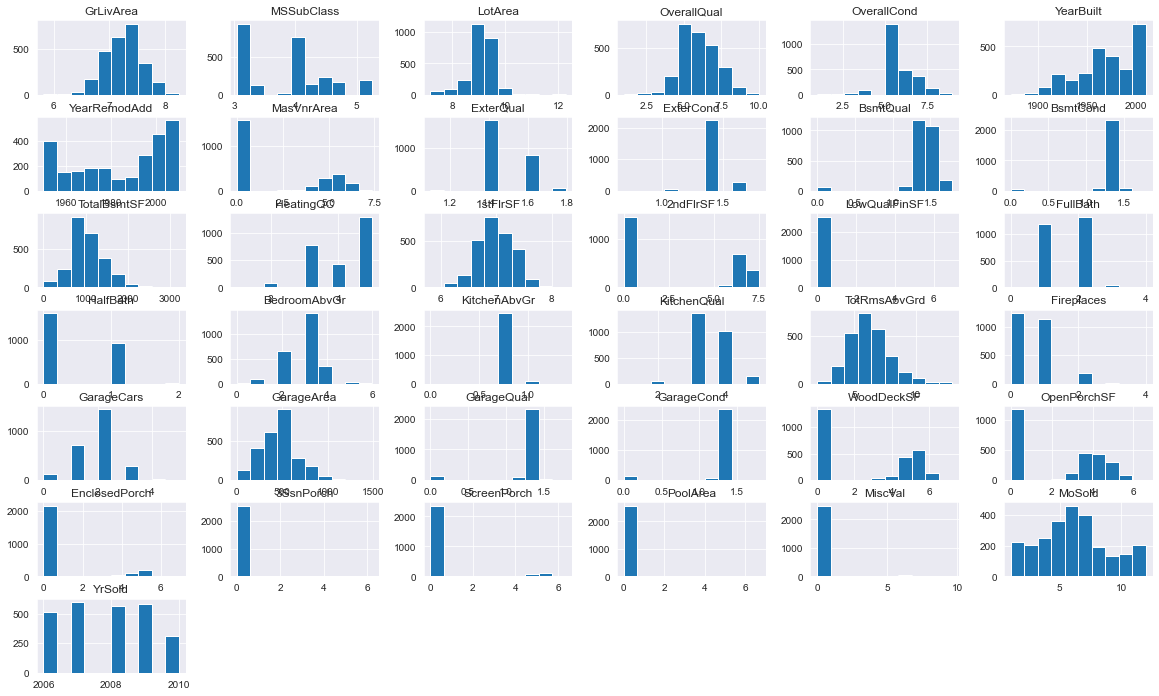

In [67]:
X.hist(figsize=(20,12))